# Project: Wrangling and Analyze Data

In [68]:
# Import required libraries for the project.

import pandas as pd
import numpy as np
import requests
import io
import tweepy
import json
import warnings
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [69]:
we_rate_df = pd.read_csv('twitter-archive-enhanced.csv')
print(we_rate_df.shape)
we_rate_df.head()

(2356, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [70]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

image_content = requests.get(url).content

image_pred_df = pd.read_csv(io.StringIO(image_content.decode('utf-8')),sep='\t')
print(image_pred_df.shape)
image_pred_df.head()

(2075, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [199]:
# Save the Tsv file...

with open('image_predictions.tsv','w') as write_tsv:
    write_tsv.write(image_pred_df.to_csv(sep='\t', index=False))

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [71]:
# Twitter API Version 1 Authentication

CONSUMER_KEY = "Consumer key"
CONSUMER_SECRET = "consumer secret"
OAUTH_TOKEN = "Token"
OAUTH_TOKEN_SECRET = "Token Secret"

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)

# Fetching the tweets with there ID's

tweet = []
for m in we_rate_df["tweet_id"]:
    try:
        tweets = api.get_status(m)
        tweet.append(tweets)
    except:
        continue

Rate limit reached. Sleeping for: 736
Rate limit reached. Sleeping for: 737


In [72]:
len(tweet)

2327

In [73]:
# Get the _json file and the needed details from the tweets

tweet_json = []
tweet_id = []
tweet_retweet = []
tweet_likes = []
for t in tweet:
    tweet_json.append(t._json)
    tweet_id.append(t.id)
    tweet_retweet.append(t.retweet_count)
    tweet_likes.append(t.favorite_count)

In [126]:
# Save the _json file as a txt file format

with open('tweet_json.txt', 'w') as f:
    json.dump(tweet_json, f)
    f.write('\n')

In [127]:
# Combine the three list containing the tweet details into a dataframe.

tweet_info = pd.DataFrame(
                        {'tweet_id': tweet_id,
                         'number_of_likes': tweet_likes,
                         'number_of_retweets': tweet_retweet
                        })
print(tweet_info.shape)
tweet_info.head()

(2327, 3)


,tweet_id,number_of_likes,number_of_retweets
0,892420643555336193,33713,6979
1,892177421306343426,29255,5280
2,891815181378084864,21987,3466
3,891689557279858688,36823,7198
4,891327558926688256,35207,7723


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [76]:
we_rate_df.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2269,667509364010450944,NaN,NaN,2015-11-20 01:06:48 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This a Norwegian Pewterschmidt named Tickles. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667509364...,12,10,None,None,None,None,None
1173,720340705894408192,NaN,NaN,2016-04-13 19:59:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. He just got balled on. Can't ev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720340705...,10,10,Derek,None,None,pupper,None
142,864279568663928832,NaN,NaN,2017-05-16 00:41:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Meatball. He doing what's known in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/864279568...,12,10,Meatball,None,None,None,None
1802,676949632774234114,NaN,NaN,2015-12-16 02:19:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tyrus. He's a Speckled Centennial Tico...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676949632...,8,10,Tyrus,None,None,None,None
1929,674042553264685056,NaN,NaN,2015-12-08 01:47:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yea I can't handle the cuteness anymore. Curls...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674042553...,12,10,None,None,None,None,None
1781,677698403548192770,NaN,NaN,2015-12-18 03:54:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She got her holidays confused. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677698403...,9,10,Sadie,None,None,None,None
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm aware that I could've said 20/16, but here...",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None
942,752917284578922496,NaN,NaN,2016-07-12 17:27:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Grizzie. She's a semi-submerged Bahrai...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752917284...,11,10,Grizzie,None,None,None,None
943,752701944171524096,NaN,NaN,2016-07-12 03:11:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: HEY PUP WHAT'S THE PART OF THE ...,6.835159e+17,4.196984e+09,2016-01-03 05:11:12 +0000,"https://vine.co/v/ibvnzrauFuV,https://vine.co/...",11,10,None,None,None,None,None
1813,676776431406465024,NaN,NaN,2015-12-15 14:50:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","When someone yells ""cops!"" at a party and you ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/676776431...,10,10,None,None,None,None,None


In [77]:
#disable warnings
warnings.simplefilter('ignore')

In [78]:
# View rows where text column contains ./ indicating a decimal for the rating numerator, 
# however they do not appear in the 'rating_numerator' column
we_rate_df[we_rate_df.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


In [79]:
we_rate_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [80]:
we_rate_df.duplicated().sum()

0

In [81]:
we_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [82]:
we_rate_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [83]:
image_pred_df.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [84]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [85]:
image_pred_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,2075.0,7.384514e+17,6.785203e+16,6.660209e+17,6.764835e+17,7.119988e+17,7.932034e+17,8.924206e+17
img_num,2075.0,1.203855e+00,5.618750e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
p1_conf,2075.0,5.945483e-01,2.711735e-01,4.433340e-02,3.644120e-01,5.882300e-01,8.438550e-01,1.000000e+00
p2_conf,2075.0,1.345886e-01,1.006657e-01,1.011300e-08,5.388625e-02,1.181810e-01,1.955655e-01,4.880140e-01
p3_conf,2075.0,6.032417e-02,5.090593e-02,1.740170e-10,1.622240e-02,4.944380e-02,9.180755e-02,2.734190e-01


In [86]:
tweet_info.head(10)

,tweet_id,number_of_likes,number_of_retweets
0,892420643555336193,33713,6979
1,892177421306343426,29255,5280
2,891815181378084864,21987,3466
3,891689557279858688,36823,7198
4,891327558926688256,35207,7723
5,891087950875897856,17757,2590
6,890971913173991426,10340,1649
7,890729181411237888,56701,15695
8,890609185150312448,24455,3605
9,890240255349198849,27878,6081


In [87]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id              2327 non-null int64
number_of_likes       2327 non-null int64
number_of_retweets    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


### Quality issues
1. Tweets with no images.

2. Dataset contains retweets

3. Erroneous datatypes (`timestamp`, `source`, `dog stages`, `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`)

4. Missing values in `name`` and dog stages showing as 'None'

5. Sources difficult to read (contains the hyper ref instead of just the url)

6. Extra characters after '&'

7. Incorrect dog names

8. Tweet with more than one / sometimes have the first occurence erroneously used for the rating numerators and denominators

### Tidiness issues
1. Dog "stage" variable spread in four columns: `doggo`, `floofer`, `pupper`, `puppo`.

2. Join `tweet_info` and `image_pred_df` to `we_rate_df`

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [88]:
# Make copies of original pieces of data
we_rate_df_clean = we_rate_df.copy()
image_pred_df_clean = image_pred_df.copy()
tweet_info_clean = tweet_info.copy()

### Issue #1:

#### Define:

Join tweet_info and image_pred_df to we_rate_df

#### Code

In [89]:
we_rate_df_clean = pd.merge(left=we_rate_df_clean, right=tweet_info_clean, left_on='tweet_id', right_on='tweet_id', how='inner')
we_rate_df_clean = we_rate_df_clean.merge(image_pred_df_clean, on='tweet_id', how='inner')

#### Test

In [90]:
we_rate_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 30 columns):
tweet_id                      2057 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2057 non-null object
source                        2057 non-null object
text                          2057 non-null object
retweeted_status_id           71 non-null float64
retweeted_status_user_id      71 non-null float64
retweeted_status_timestamp    71 non-null object
expanded_urls                 2057 non-null object
rating_numerator              2057 non-null int64
rating_denominator            2057 non-null int64
name                          2057 non-null object
doggo                         2057 non-null object
floofer                       2057 non-null object
pupper                        2057 non-null object
puppo                         2057 non-null object
number_of_likes               2057 

### Issue #2:

#### Define

Create dog stage variable and remove individual dog stage columns.

#### Code

In [91]:
# Create 'dog_stage' variable which is made by extracting the dog stage variables from the text column when available 
we_rate_df_clean['dog_stage'] = we_rate_df_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [92]:
# Create variable of columns that are no longer needed and drop them from the DataFrame 
columns = ['doggo', 'floofer', 'pupper', 'puppo']
we_rate_df_clean = we_rate_df_clean.drop(columns, axis=1)

#### Test

In [93]:
we_rate_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 27 columns):
tweet_id                      2057 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2057 non-null object
source                        2057 non-null object
text                          2057 non-null object
retweeted_status_id           71 non-null float64
retweeted_status_user_id      71 non-null float64
retweeted_status_timestamp    71 non-null object
expanded_urls                 2057 non-null object
rating_numerator              2057 non-null int64
rating_denominator            2057 non-null int64
name                          2057 non-null object
number_of_likes               2057 non-null int64
number_of_retweets            2057 non-null int64
jpg_url                       2057 non-null object
img_num                       2057 non-null int64
p1                            2057 non

#### Define
Drop rows where there are no images (expanded_urls).


#### Code

In [94]:
we_rate_df_clean = we_rate_df_clean.dropna(subset=['expanded_urls'])

### Test

In [95]:
we_rate_df_clean['expanded_urls'].isnull().sum()

0

#### Define

Remove retweets.

#### Code

In [96]:
we_rate_df_clean = we_rate_df_clean[we_rate_df_clean['retweeted_status_id'].isnull()]

In [97]:
# Drop columns relating to retweet

columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
we_rate_df_clean = we_rate_df_clean.drop(columns, axis=1)

#### Test

In [98]:
we_rate_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2056
Data columns (total 24 columns):
tweet_id                 1986 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1986 non-null object
source                   1986 non-null object
text                     1986 non-null object
expanded_urls            1986 non-null object
rating_numerator         1986 non-null int64
rating_denominator       1986 non-null int64
name                     1986 non-null object
number_of_likes          1986 non-null int64
number_of_retweets       1986 non-null int64
jpg_url                  1986 non-null object
img_num                  1986 non-null int64
p1                       1986 non-null object
p1_conf                  1986 non-null float64
p1_dog                   1986 non-null bool
p2                       1986 non-null object
p2_conf                  1986 non-null float64
p2_dog                   19

#### Define

Change incorrect dog names.

#### Code

In [99]:
# Set column width to infinite so entire content of 'text' column is displayed

pd.set_option('display.max_colwidth', -1)

In [100]:
# Save locations where 'name' column is lowercase, lowercase and 'text' column contains 'named' and lowercase and 'text'
# column contains the words 'name is'
named_to_replace = we_rate_df_clean.loc[(we_rate_df_clean['name'].str.islower()) & (we_rate_df_clean['text'].str.contains('named'))]
name_is_to_replace = we_rate_df_clean.loc[(we_rate_df_clean['name'].str.islower()) & (we_rate_df_clean['text'].str.contains('name is'))]
not_named_to_replace = we_rate_df_clean.loc[(we_rate_df_clean['name'].str.islower())]

# Save these locations as lists
named_to_replace_list = named_to_replace['text'].tolist()
name_is_to_replace_list = name_is_to_replace['text'].tolist()
not_named_to_replace_list = not_named_to_replace['text'].tolist()

# For loop to iterate through locations where name is lowercase and the words 'named' appear in 'text' and set the 'name' 
# value to be the word that appears after 'named'
for m in named_to_replace_list:
    mask = we_rate_df_clean.text == m
    name_column = 'name'
    we_rate_df_clean.loc[mask, name_column] = re.findall(r"named\s(\w+)", m)

# For loop to iterate through locations where name is lowercase and the words 'name is' appear in 'text' and set the 'name' 
# value to be the word that appears after 'name is'    
for m in name_is_to_replace_list:
    mask = we_rate_df_clean.text == m
    name_column = 'name'
    we_rate_df_clean.loc[mask, name_column] = re.findall(r"name is\s(\w+)", m)    

# For loop to iterate through locations where name is lowercase and replace the name value with the word "None"
for m in not_named_to_replace_list:
    mask = we_rate_df_clean.text == m
    name_column = 'name'
    we_rate_df_clean.loc[mask, name_column] = "None"

In [101]:
# Replace "O" with "O'Malley" in the name column

we_rate_df_clean.name = we_rate_df_clean.name.replace("O", "O'Malley")

#### Test

In [102]:
we_rate_df_clean.name.sort_values()

821     Abby        
832     Abby        
753     Ace         
1640    Acro        
1094    Adele       
1641    Aiden       
66      Aja         
373     Akumi       
651     Al          
699     Albert      
1660    Albert      
118     Albus       
318     Albus       
904     Aldrick     
1751    Alejandro   
288     Alexander   
976     Alexanderson
378     Alf         
1349    Alfie       
281     Alfie       
683     Alfie       
1940    Alfie       
46      Alfy        
158     Alice       
1426    Alice       
1244    Amber       
1101    Ambrose     
1783    Amy         
1898    Amélie      
617     Anakin      
         ...        
744     Winnie      
624     Winnie      
1542    Winston     
1838    Winston     
1021    Winston     
648     Winston     
793     Winston     
218     Winston     
442     Winston     
314     Winston     
701     Wishes      
1206    Wyatt       
316     Wyatt       
142     Wyatt       
1140    Yoda        
486     Yogi        
38      Yogi 

In [103]:
we_rate_df_clean.loc[(we_rate_df_clean['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_of_likes,number_of_retweets,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage


In [104]:
we_rate_df_clean[we_rate_df_clean.name == "O'Malley"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_of_likes,number_of_retweets,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
612,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O'Malley,9008,2330,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,1,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True,NaN


#### Define

Change missing values in 'name' from 'None' to NaN

#### Code

In [105]:
we_rate_df_clean['name'] = we_rate_df_clean['name'].replace('None', np.NaN)

#### Test

In [106]:
we_rate_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2056
Data columns (total 24 columns):
tweet_id                 1986 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1986 non-null object
source                   1986 non-null object
text                     1986 non-null object
expanded_urls            1986 non-null object
rating_numerator         1986 non-null int64
rating_denominator       1986 non-null int64
name                     1343 non-null object
number_of_likes          1986 non-null int64
number_of_retweets       1986 non-null int64
jpg_url                  1986 non-null object
img_num                  1986 non-null int64
p1                       1986 non-null object
p1_conf                  1986 non-null float64
p1_dog                   1986 non-null bool
p2                       1986 non-null object
p2_conf                  1986 non-null float64
p2_dog                   19

#### Define

Fixing the rating numerator and denominators that are not actually ratings.

#### Code

In [107]:
# View all occurences where there are more than one #/# in 'text' column
we_rate_df_clean[we_rate_df_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_of_likes,number_of_retweets,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
604,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",https://twitter.com/dog_rates/status/777684233540206592/photo/1,12,10,NaN,10594,2716,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True,NaN
810,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",10,10,Bookstore,2165,520,https://pbs.twimg.com/media/CmAC7ehXEAAqSuW.jpg,1,Chesapeake_Bay_retriever,0.804363,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True,NaN
861,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,NaN,32494,12097,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,NaN
952,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,NaN,3763,1431,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,NaN
986,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,2193,189,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,NaN
1002,714258258790387713,NaN,NaN,2016-03-28 01:10:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,https://twitter.com/dog_rates/status/714258258790387713/photo/1,10,10,Travis,2816,667,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,1,collie,0.176758,True,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True,NaN
1124,703356393781329922,NaN,NaN,2016-02-26 23:10:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,https://twitter.com/dog_rates/status/703356393781329922/photo/1,9,10,Socks,1764,345,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,1,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True,NaN
1214,695064344191721472,NaN,NaN,2016-02-04 

In [108]:
# Save the text where the rating numerator and denominators were incorrectly extracted

to_fix = ['After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ', 
 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a', 
 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq', 
 'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5',
 'This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv']

In [109]:
# Loop through the list of ratings to fix and extract the second occurence of / to save as the rating numerator.

for m in to_fix:
    mask = we_rate_df_clean.text == m
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    we_rate_df_clean.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", m)
    we_rate_df_clean.loc[mask, column_name2] = 10

#### Test

In [110]:
we_rate_df_clean[we_rate_df_clean.text.isin(to_fix)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_of_likes,number_of_retweets,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
861,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14,10,NaN,32494,12097,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,NaN
952,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13,10,NaN,3763,1431,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,NaN
986,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11,10,Bluebert,2193,189,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,NaN
1390,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,10,10,Darrel,33721,14845,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False,NaN


#### Define

Remove extra characters after '&' in we_rate_df_clean['text'].

#### Code

In [111]:
we_rate_df_clean['text'] = we_rate_df_clean['text'].str.replace('&amp;', '&')

#### Test

In [112]:
we_rate_df_clean[we_rate_df_clean.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_of_likes,number_of_retweets,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage


#### Define

Change sources to more readable categories.
Also change the data type to category

#### Code

In [113]:
we_rate_df_clean.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [114]:
# Remove url from sources
we_rate_df_clean['source'] = we_rate_df_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
we_rate_df_clean['source'] = we_rate_df_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
we_rate_df_clean['source'] = we_rate_df_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
we_rate_df_clean['source'] = we_rate_df_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')


In [115]:
# Change datatype to category

we_rate_df_clean['source'] = we_rate_df_clean['source'].astype('category')

#### Test

In [116]:
we_rate_df_clean.source.unique()

[Twitter for iPhone, Twitter Web Client, TweetDeck]
Categories (3, object): [Twitter for iPhone, Twitter Web Client, TweetDeck]

#### Define

Change datatypes of timestamp to datetime, dog_stage to categorical, and tweet_id, in_reply_to_status_id, and in_reply_to_user_id to strings.

#### Code

In [117]:
we_rate_df_clean['dog_stage'] = we_rate_df_clean['dog_stage'].astype('category')
we_rate_df_clean['timestamp'] = pd.to_datetime(we_rate_df_clean['timestamp'])
we_rate_df_clean['tweet_id'] = we_rate_df_clean['tweet_id'].astype('str')
we_rate_df_clean['in_reply_to_status_id'] = we_rate_df_clean['in_reply_to_status_id'].astype('str')
we_rate_df_clean['in_reply_to_user_id'] = we_rate_df_clean['in_reply_to_user_id'].astype('str')

#### Test

In [118]:
we_rate_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2056
Data columns (total 24 columns):
tweet_id                 1986 non-null object
in_reply_to_status_id    1986 non-null object
in_reply_to_user_id      1986 non-null object
timestamp                1986 non-null datetime64[ns]
source                   1986 non-null category
text                     1986 non-null object
expanded_urls            1986 non-null object
rating_numerator         1986 non-null object
rating_denominator       1986 non-null int64
name                     1343 non-null object
number_of_likes          1986 non-null int64
number_of_retweets       1986 non-null int64
jpg_url                  1986 non-null object
img_num                  1986 non-null int64
p1                       1986 non-null object
p1_conf                  1986 non-null float64
p1_dog                   1986 non-null bool
p2                       1986 non-null object
p2_conf                  1986 non-null float64
p2_dog       

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [128]:
we_rate_df_clean.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [129]:
# Read in the cleaned master dataset

df = pd.read_csv("twitter_archive_master.csv")

In [130]:
pd.set_option('display.max_columns', None)

df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_of_likes,number_of_retweets,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
279,827933404142436356,NaN,NaN,2017-02-04 17:34:40,Twitter for iPhone,This is Kona. Yesterday she stopped by the department to see what it takes to be a police pupper. 12/10 vest was only a smidge too big https://t.co/j8D3PQJvpJ,"https://twitter.com/dog_rates/status/827933404142436356/photo/1,https://twitter.com/dog_rates/status/827933404142436356/photo/1,https://twitter.com/dog_rates/status/827933404142436356/photo/1",12,10,Kona,18804,4817,https://pbs.twimg.com/media/C31pCN4UcAAOLNH.jpg,2,German_shepherd,0.806115,True,Tibetan_mastiff,0.104831,True,kelpie,0.038148,True,pupper
1910,667405339315146752,NaN,NaN,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7,10,Biden,410,196,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,NaN
159,852553447878664193,NaN,NaN,2017-04-13 16:05:56,Twitter for iPhone,This is Jarod. He likes having his belly brushed. Tongue ejects when you hit the right spot. 13/10 downright h*ckin adorable https://t.co/ArnxkyD2kC,"https://twitter.com/dog_rates/status/852553447878664193/photo/1,https://twitter.com/dog_rates/status/852553447878664193/photo/1",13,10,Jarod,14877,3105,https://pbs.twimg.com/media/C9Tg1bPW0AkAMDI.jpg,1,bloodhound,0.186498,True,Brabancon_griffon,0.139028,True,Rottweiler,0.125940,True,NaN
1470,676440007570247681,NaN,NaN,2015-12-14 16:34:00,Twitter for iPhone,Hope your Monday isn't too awful. Here's two baseball puppers. 11/10 for each https://t.co/dB0H9hdZai,"https://twitter.com/dog_rates/status/676440007570247681/photo/1,https://twitter.com/dog_rates/status/676440007570247681/photo/1",11,10,NaN,1561,588,https://pbs.twimg.com/media/CWMyl9EWUAAnZJ0.jpg,2,Maltese_dog,0.579472,True,toy_poodle,0.133446,True,Shih-Tzu,0.094397,True,pupper
799,739844404073074688,NaN,NaN,2016-06-06 15:40:26,Twitter for iPhone,This is Simba. He's the grand prize. The trophy is just for participation. 12/10 would pet so damn well https://t.co/4qiuC0lXq5,https://twitter.com/dog_rates/status/739844404073074688/photo/1,12,10,Simba,3520,785,https://pbs.twimg.com/media/CkR0jrhWYAALL5N.jpg,1,toy_poodle,0.342397,True,table_lamp,0.104451,False,miniature_poodle,0.079871,True,NaN
718,749996283729883136,NaN,NaN,2016-07-04 16:00:22,TweetDeck,This is Bo. He emanates happiness. 12/10 I could cut the freedom with a knife https://t.co/c7LNFt39eR,https://twitter.com/dog_rates/status/749996283729883136/photo/1,12,10,Bo,2825,754,https://pbs.twimg.com/media/CmfoyrrW8AA8v7w.jpg,1,Old_English_sheepdog,0.515319,True,West_Highland_white_terrier,0.151040,True,soft-coated_wheaten_terrier,0.056420,True,NaN
424,800459316964663297,NaN,NaN,2016-11-20 22:02:27,Twitter for iPhone,Here's a very sleepy pupper. Appears to be portable as h*ck. 12/10 would snug intensely https://t.co/61sX7pW5Ca,https://twitter.com/dog_rates/status/800459316964663297/photo/1,12,10,NaN,9028,2056,https://pbs.twimg.com/media/CxvNfrhWQAA2hKM.jpg,1,teddy,0.311928,False,ice_bear,0.184657,False,Christmas_stocking,0.173229,False,pupper
615,765719909049503744,NaN,NaN,2016-08-17 01:20:27,Twitter for iPhone,This is Brat. He has a hard time being ferocious so his owner helps out. H*ckin scary af now. 12/10 would still pet https://t.co/soxdNqZDZ2,https://twitter.com/dog_rates/status/765719909049503744/photo/1,12,10,Brat,6790,1987,https://pbs.twimg.com/media/CqBiMAgWAAEJKgI.jpg,1,golden_retriever,0.969518,True,Labrador_retriever,0.021696,True,Border_terrier,0.002075,True,NaN
1120,697596423848730625,NaN,NaN,2016-02-11 01:42:02,Twitter for iPhone,Here's a pupper with a piece of pizza. Two of everybody's favorite things in one photo. 11/10 https://t.

#### Insight 1

Check the Rating ratio across tweets

In [131]:
# Create a rating ratio by dividing the numerator by the denominator

df["rating_ratio"] = df["rating_numerator"]/df["rating_denominator"]

In [132]:
df["rating_ratio"].head()

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: rating_ratio, dtype: float64

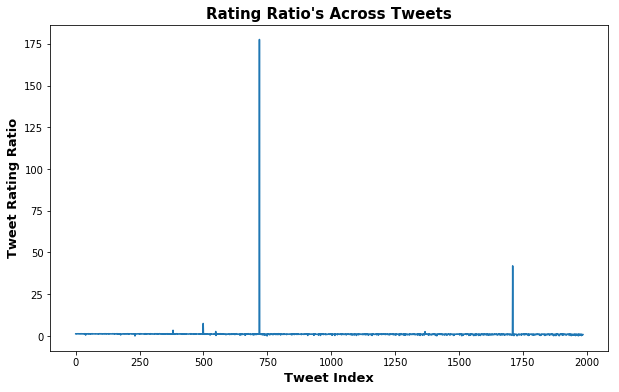

In [134]:
# Plot to visualize the rating_ratio

df["rating_ratio"].plot(figsize=[10,6])
plt.xlabel("Tweet Index", fontsize=13, weight='bold')
plt.ylabel("Tweet Rating Ratio", fontsize=13, weight='bold')
plt.title("Rating Ratio's Across Tweets", fontsize=15, weight='bold');

In [135]:
# Sort the rating ratio column to get the outliers

df["rating_ratio"].sort_values().tail(15)

145     1.400000  
320     1.400000  
64      1.400000  
253     1.400000  
250     1.400000  
146     1.400000  
161     1.400000  
328     1.400000  
779     1.400000  
1367    2.600000  
548     2.700000  
381     3.428571  
499     7.500000  
1710    42.000000 
719     177.600000
Name: rating_ratio, dtype: float64

In [136]:
# Deep dive on the dataframe to view the outliers and get their url's

df.query('index in [1710,719]')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_of_likes,number_of_retweets,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating_ratio
719,749981277374128128,NaN,NaN,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,4772,2272,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,NaN,177.6
1710,670842764863651840,NaN,NaN,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,NaN,22036,7558,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,NaN,42.0


#### Insight 2
Check if the number of images contained in the tweet affects the number of likes it gets.

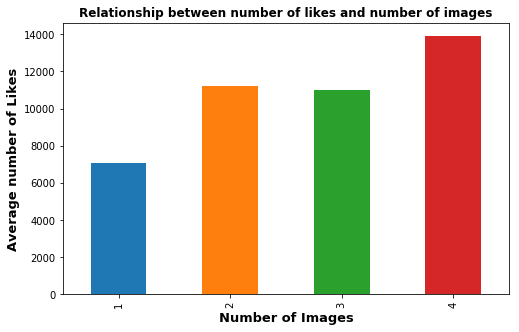

In [176]:
img_likes = df.groupby('img_num')['number_of_likes'].mean()
img_likes.plot(kind='bar', figsize=[8, 5])
plt.xlabel("Number of Images", fontsize=13, weight='bold')
plt.ylabel("Average number of Likes", fontsize=13, weight='bold')
plt.title("Relationship between number of likes and number of images", weight='bold');

From the above chart, adding more pictures to a tweet gets more likes.

#### Insight 3


In [177]:
# Get the top ten dogs by rating ratio

df_ratio= pd.DataFrame(df.groupby('name')['rating_ratio'].mean().sort_values())
df_ratio.tail(10)

,rating_ratio
name,
General,1.400000
Clifford,1.400000
Sundance,1.400000
Kuyu,1.400000
Emmy,1.400000
Iggy,1.400000
Sophie,1.500000
Sam,2.214286
Logan,7.500000


In [179]:
# Get the top ten dogs by number of likes.

df_likes= df.groupby('name')['number_of_likes'].mean().sort_values()
df_likes.tail(10)

name
Dewey      37922.0 
Alfy       39075.0 
Barney     41118.0 
Pipsy      42173.0 
Canela     60028.0 
Lilly      62315.0 
Aja        69098.0 
Duddles    92592.0 
Jamesy     108583.0
Stephan    111319.0
Name: number_of_likes, dtype: float64

From the above insight the top 10 dogs that got the highest ratings did not appear in the top ten dogs with the highest number of likes.
This shows that there is no correlation between that rating ratio and number of likes a dog gets.

### Insights:
1. The Rating ratio ranges between 0 and 7.5 with two outstanding outliers. which ended up to be tweets that was made for fun (comedic).

2. Adding more images to a tweet gets more likes, this can attributed to the fact that viewers/readers have the flexiblity of veiwing the dog in different postures, actions or environments.

3. Dogs with the highest ratings didn't get the highest number of likes.

### Visualization

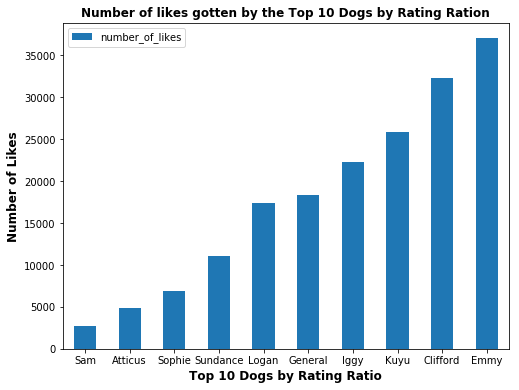

In [197]:
# Plot the top ten dogs by rating ration, against their number of likes.

mask = df_ratio.tail(10).index
df_likes = pd.DataFrame(df_likes)
df_likes[df_likes.index.isin(mask)].plot(kind='bar', figsize=[8,6], rot=0)
plt.xlabel("Top 10 Dogs by Rating Ratio", fontsize=12, weight='bold')
plt.ylabel("Number of Likes", fontsize=12, weight='bold')
plt.title("Number of likes gotten by the Top 10 Dogs by Rating Ration",fontsize=12, weight='bold');